In [1]:
import wooldridge as woo
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.formula.api import glm
from statsmodels.stats.diagnostic import acorr_breusch_godfrey as bgtest
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
import seaborn as sns
import gretltests
import matplotlib.pyplot as plt
import numpy as np
import augmentdata
from statsmodels.tools.tools import add_constant
plt.rcParams['figure.figsize'] = [10, 5]

# Session 18 Slides

In [2]:
data=pd.read_csv('data13-1.csv')

In [3]:
#data['GDPpercap']=data.GDP/data.POP
data['GDPpercap']=data.GDP/data.POP
data['CONSpercap']=data.CONS/data.POP
data['GDPpercapmillons']=data.GDPpercap*1000
data['time']=np.arange(1,len(data)+1)

In [4]:
data['l_GDPpercap']=np.log(data.GDP/data.POP)
data['l_CONSpercap']=np.log(data.CONS/data.POP)
data['l_GDPpercapmillons']=np.log(data.GDPpercap*1000)
data['l_time']=np.arange(1,len(data)+1)

In [5]:
mod0=ols('CONSpercap~GDPpercap+time',data=data).fit()
mod0_=ols('CONSpercap~GDPpercapmillons+time',data).fit()
print(mod0.summary())
print(mod0_.summary())

                            OLS Regression Results                            
Dep. Variable:             CONSpercap   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     6251.
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           3.26e-42
Time:                        09:23:12   Log-Likelihood:                 28.581
No. Observations:                  35   AIC:                            -51.16
Df Residuals:                      32   BIC:                            -46.50
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2461      0.519      2.402      0.0

In [6]:
mod1=ols('l_CONSpercap~l_GDPpercap+time',data=data).fit()
mod1_=ols('l_CONSpercap~l_GDPpercapmillons+time',data).fit()
print(mod1.summary())
print(mod1_.summary())

                            OLS Regression Results                            
Dep. Variable:           l_CONSpercap   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     5033.
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.04e-40
Time:                        09:23:12   Log-Likelihood:                 104.21
No. Observations:                  35   AIC:                            -202.4
Df Residuals:                      32   BIC:                            -197.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.2286      0.154     -1.487      

In [7]:
mod2=ols('l_CONSpercap~l_GDPpercap+time+l_GDPpercap*time',data=data).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:           l_CONSpercap   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     4002.
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           3.36e-40
Time:                        09:23:12   Log-Likelihood:                 107.84
No. Observations:                  35   AIC:                            -207.7
Df Residuals:                      31   BIC:                            -201.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0527      0.155  

In [8]:
mod3=ols('l_CONSpercap~l_GDPpercap+time+I(time**2)+I(l_GDPpercap**2)+l_GDPpercap*time',data=data).fit()
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:           l_CONSpercap   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3744.
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           8.27e-40
Time:                        09:23:12   Log-Likelihood:                 116.77
No. Observations:                  35   AIC:                            -221.5
Df Residuals:                      29   BIC:                            -212.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.2874    

In [9]:
restrictions='(I(l_GDPpercap ** 2)=0),(I(time ** 2) =0)'
print(mod3.f_test(restrictions))
mod3b=ols('l_CONSpercap~l_GDPpercap+time+l_GDPpercap*time',data=data).fit()
print(mod3b.summary())

print('aic comparison',mod3.aic,mod3b.aic)
print('bic comparison',mod3.bic,mod3b.bic)


<F test: F=array([[9.64633873]]), p=0.0006144582035864747, df_denom=29, df_num=2>
                            OLS Regression Results                            
Dep. Variable:           l_CONSpercap   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     4002.
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           3.36e-40
Time:                        09:23:13   Log-Likelihood:                 107.84
No. Observations:                  35   AIC:                            -207.7
Df Residuals:                      31   BIC:                            -201.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [10]:
restrictions='(l_GDPpercap:time=0)'
print(mod3.f_test(restrictions))
mod3c=ols('l_CONSpercap~l_GDPpercap+time+I(time**2)+I(l_GDPpercap**2)',data=data).fit()
print(mod3c.summary())

print('aic comparison',mod3.aic,mod3c.aic)
print('bic comparison',mod3.bic,mod3c.bic)


<F test: F=array([[0.12209966]]), p=0.7292930409776335, df_denom=29, df_num=1>
                            OLS Regression Results                            
Dep. Variable:           l_CONSpercap   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4821.
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.18e-41
Time:                        09:23:13   Log-Likelihood:                 116.70
No. Observations:                  35   AIC:                            -223.4
Df Residuals:                      30   BIC:                            -215.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [11]:

mod4=ols('l_CONSpercap~l_GDPpercap+time+I(time**2)+I(l_GDPpercap**2)',data=data).fit()
print(mod4.summary())

b=mod4.params

                            OLS Regression Results                            
Dep. Variable:           l_CONSpercap   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4821.
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.18e-41
Time:                        09:23:13   Log-Likelihood:                 116.70
No. Observations:                  35   AIC:                            -223.4
Df Residuals:                      30   BIC:                            -215.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.0089    

In [12]:
b.l_GDPpercap+2*b['I(l_GDPpercap ** 2)']*data.l_GDPpercap.mean()

0.7603162828377052

# Session 18 Interactive

In [13]:
ceosal1=woo.data('ceosal1')
woo.data('ceosal1',description=True)

name of dataset: ceosal1
no of variables: 12
no of observations: 209

+----------+-------------------------------+
| variable | label                         |
+----------+-------------------------------+
| salary   | 1990 salary, thousands $      |
| pcsalary | % change salary, 89-90        |
| sales    | 1990 firm sales, millions $   |
| roe      | return on equity, 88-90 avg   |
| pcroe    | % change roe, 88-90           |
| ros      | return on firm's stock, 88-90 |
| indus    | =1 if industrial firm         |
| finance  | =1 if financial firm          |
| consprod | =1 if consumer product firm   |
| utility  | =1 if transport. or utilties  |
| lsalary  | natural log of salary         |
| lsales   | natural log of sales          |
+----------+-------------------------------+

I took a random sample of data reported in the May 6, 1991 issue of
Businessweek.


In [14]:
ceosal1['lsalary']=np.log(ceosal1.salary)
ceosal1['lsales_']=np.log(ceosal1.sales)-np.log(ceosal1.sales).mean()
ceosal1['lroe_']=np.log(ceosal1.roe)-np.log(ceosal1.roe).mean()
ceosal1['lsales_sq']=ceosal1.lsales_**2
ceosal1['lroe_sq']=ceosal1.lroe_**2
ceosal1['lsales_lroe']=ceosal1.lroe_*ceosal1.lsales_

In [15]:
ceosal1a=ceosal1.iloc[0:159,:]
ceosal1b=ceosal1.iloc[159:,:]
ceosal1a

salary  pcsalary         sales        roe       pcroe  ros  indus  \
0      1095        20  27595.000000  14.100000  106.400002  191      1   
1      1001        32   9958.000000  10.900000  -30.600000   13      1   
2      1122         9   6125.899902  23.500000  -16.299999   14      1   
3       578        -9  16246.000000   5.900000  -25.700001  -21      1   
4      1368         7  21783.199219  13.800000   -3.000000   56      1   
..      ...       ...           ...        ...         ...  ...    ...   
154    1568        47   5181.399902  28.200001  -19.100000   55      0   
155     995        15   1323.000000  15.400000   74.599998  195      0   
156    1077       -16   5296.000000  20.000000   27.500000   36      0   
157    1161         9   7177.000000  42.200001   -2.800000   68      0   
158    1401         1  12183.500000  19.600000   -2.100000   93      0   

     finance  consprod  utility   lsalary     lsales   lsales_     lroe_  \
0          0         0        0  6.998510  10.225389  1.933125 -0.074126   
1          0         0        0  6.908755   9.206132  0.913867 -0.331538   
2          0         0        0  7.022868   8.720281  0.428016  0.436700   
3          0         0        0  6.359574   9.695602  1.403337 -0.945348   
4          0         0        0  7.221105   9.988894  1.696629 -0.095632   
..       ...       ...      ...       ...        ...       ...       ...   
154        0         1        0  7.357556   8.552831  0.260566  0.619021   
155        0         1        0  6.902743   7.187657 -1.104608  0.014067   
156        0         1        0  6.981935   8.574707  0.282442  0.275431   
157        0         1        0  7.057037   8.878636  0.586372  1.022119   
158        0         1        0  7.244942   9.407838  1.115573  0.255229   

     lsales_sq   lroe_sq  lsales_lroe  
0     3.736973  0.005495    -0.143295  
1     0.835152  0.109918    -0.302982  
2     0.183198  0.190707     0.186914  
3     1.969355  0.893684    -1.326643  
4     2.878552  0.009146    -0.162252  
..         ...       ...          ...  
154   0.067895  0.383187     0.161296  
155   1.220158  0.000198    -0.015538  
156   0.079774  0.075862     0.077793  
157   0.343832  1.044728     0.599342  
158   1.244503  0.065142     0.284726  

[159 rows x 17 columns]

In [16]:
f='lsalary~lsales_+lroe_+lsales_sq+lroe_sq+lsales_lroe+indus+finance+consprod'

In [17]:
mod5=ols(f,data=ceosal1a).fit()
print(mod5.summary())

                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     11.83
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           5.44e-13
Time:                        09:23:14   Log-Likelihood:                -69.812
No. Observations:                 159   AIC:                             157.6
Df Residuals:                     150   BIC:                             185.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.1427      0.174     41.056      

In [18]:
restrictions='(indus=0),(finance=0),(consprod=0),(lsales_lroe=0)'
print(mod5.f_test(restrictions))
mod6=glm(f,data=ceosal1a)
out=mod6.fit_constrained(restrictions)
print(out.summary())
print('aic and bic',out.aic,out.bic_llf)

<F test: F=array([[0.9174612]]), p=0.45548195835585414, df_denom=150, df_num=4>
                 Generalized Linear Model Regression Results                  
Dep. Variable:                lsalary   No. Observations:                  159
Model:                            GLM   Df Residuals:                      154
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                         0.14903
Method:                          IRLS   Log-Likelihood:                -71.734
Date:                Sat, 07 Jan 2023   Deviance:                       22.950
Time:                        09:23:14   Pearson chi2:                     23.0
No. Iterations:                     1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

In [19]:
b=out.params
ind=list(b.index)
ind[0]='const'
b.index=ind
ceosal1b=add_constant(ceosal1b,prepend=True)
forc=ceosal1b[list(b.index)]@b
ceosal1b['forecast']=forc

<AxesSubplot:>

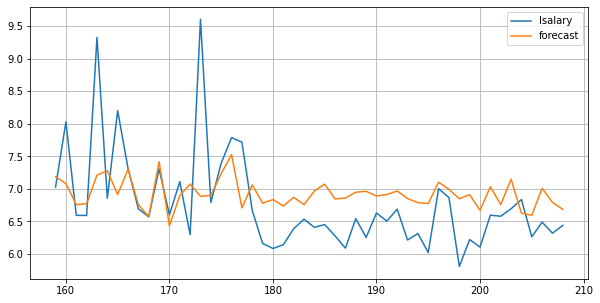

In [20]:
ceosal1b[['lsalary','forecast']].plot(grid=True)

<AxesSubplot:>

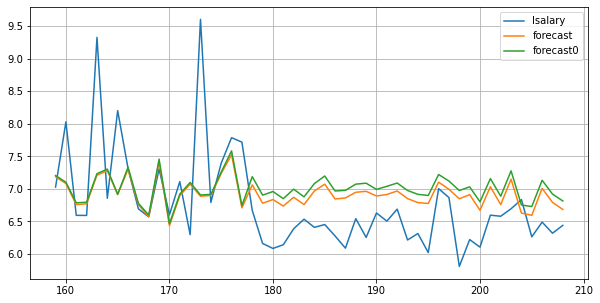

In [21]:
b0=mod5.params
ind=list(b0.index)
ind[0]='const'
b0.index=ind
#ceosal1b=add_constant(ceosal1b,prepend=True)
forc0=ceosal1b[list(b0.index)]@b0
ceosal1b['forecast0']=forc0
ceosal1b[['lsalary','forecast','forecast0']].plot(grid=True)

In [22]:
error=ceosal1b.lsalary-forc
error0=ceosal1b.lsalary-forc0
ceosal1b['e']=error
ceosal1b['e0']=error0


In [23]:
e=ceosal1b[['e','e0']].iloc[-50:,:]
df=pd.DataFrame([e.mean(),np.sqrt((e**2).mean()),np.abs(e).mean()])
df.index=['Mean Error','Root Mean Squared Error','Mean Absolute Error']
#I will just do a few of the measures
df

e        e0
Mean Error              -0.151021 -0.237384
Root Mean Squared Error  0.708166  0.759576
Mean Absolute Error      0.515315  0.586611

In [24]:
f6='lsalary~lsales_+lroe_+lsales_sq+lroe_sq'
mod6=ols(f6,data=ceosal1b.iloc[-50:,:]).fit()
print(mod6.summary())

                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     4.016
Date:                Sat, 07 Jan 2023   Prob (F-statistic):            0.00720
Time:                        09:23:15   Log-Likelihood:                -48.816
No. Observations:                  50   AIC:                             107.6
Df Residuals:                      45   BIC:                             117.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8524      0.139     49.398      0.0

In [25]:
#You can remove the intercept as follows, not sure why there is a very small difference with gretl
f6='lsalary~forecast-1'
mod6=ols(f6,data=ceosal1b.iloc[-50:,:]).fit()
print(mod6.summary())

                                 OLS Regression Results                                
Dep. Variable:                lsalary   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              4689.
Date:                Sat, 07 Jan 2023   Prob (F-statistic):                    2.59e-50
Time:                        09:23:15   Log-Likelihood:                         -52.570
No. Observations:                  50   AIC:                                      107.1
Df Residuals:                      49   BIC:                                      109.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [26]:
#The centered version of r-squared is
1-mod6.ssr/mod6.centered_tss

0.14367288689553093